# Supervised Learning with Structured Data

**PHYS-555 Winter 2020 - Assignment #6**


Copy this notebook, edit and format it as you wish, as long as we can understand you answered the questions, and we can reproduce every cell.

## Knowledge Part (50%)

You can answer the questions with a notebook cell below each question.


1.  Give at least one metric and one visual method to evaluate classification models. Which data set (training, validation, test) should you use to compute these metrics?  

<font color='green'>You can use the validation loss as a metric to evaluate the performance of a classification model. Visually, you might use a confusion matrix plot, which shows the total (or fractional number) of items in each category: True Positives, False Positives, True Negatives, and False Negatives. Generally, if you have a separate validation set that the network has never seen in training, these metrics are applied to the validation set.</font>

2. Give at least one metric and one visual method to evaluate predictions from a regression model. Is this metric robust to outlier?  


<font color='green'>For a regression model, you might use the mean, median, and standard deviation statistics to determine the quality of a fit. The mean and standard deviation are not outlier-robust, but the median is. Graphically, you might plot the mean-squared error (MSE) versus training epoch. This is also not outlier-robust.</font>

3. How would you regularize a Linear SVM model for a binary classification problem? Can you do multi-class classification with a SVM?



<font color='green'>For a binary classification problem, you can regularize a linear SVM model by varying the parameter C, which influences the width of the margin that is used to identify the optimal line. Large to infinite C values narrow the margin, with a harder cutoff between the two classes, while smaller C values provide a wider margin with a softer cutoff. It is indeed possible to perform multiclass SVM classification.</font>

4.  Explain the difference between a single Decision Tree and a Random Forest. Which hyper-parameters in a Decision Tree can increase the chance of overfitting? Which hyper-parameters in a Random Forest can prevent overfitting and how?

<font color='green'>A single decision tree separates parametric regions within the data where items of different classes reside, organized in a tree structure. Individual trees can be identified using machine learning methods. However, a random forest initializes multiple trees at random, and compares the effectiveness of each tree at classifying the data correctly. Random forests can also combine trees using ensembles, or a bootstrap aggregation method known as Bagging, which can help to clean up the boundaries of the final model's decision tree. Allowing for too much depth in trees, or too many leaves per node, or perhaps too many notes in general, can potentially result in overfitting. This can be avoided by limiting the depth, leaves per node, or number of leaf nodes. This prevents individual trees from carving up the parameter space into too many, likely unrealistic, regions.</font>

5. Use the following Random Forest model used in the class [notebook](https://colab.research.google.com/drive/1Jp2E8iAIz0xC_trTq4G3bIpIZmNom1DQ) with the [galaxy redshift data set](https://coursespaces.uvic.ca/mod/resource/view.php?id=1415479): 
```
RandomForestRegressor(n estimators=1, criterion=’mse’,
                      max_depth=50, min_samples_split=2, 
                      min_samples_leaf=2, max_leaf nodes=None,
                      bootstrap=True)
```
Evaluate your model on a 80/20 split between training and validation. Evaluate how the model performance changes when you increase the number of trees to 5 and to 100.

<font color='green'>Using the given architecture with an 80/20 split, the model performance with 5 estimators is characterized by a mean of -.0026, a median of .0026, and sigma of 0.0948. With 100 estimators, these statistics change to mean = -.0152, median = -.0096, and sigma = .0920.</font>

6. Give a simple explanation of the difference between Bagging and Boosting for Decision Trees.

<font color='green'>Bagging decreases the variance in predictions through the generation of additional data points based on the existing population of data, using combinations or interpolations of data points. Boosting involves iteratively adjusting the weights of observations based on the previous classification, so that incorrect predictions will be assigned a greater weight in the next iteration.</font>

7. Is there any difference between a one neuron Neural Network and a Logistic Regression model? What happens if we use a ReLU activation  instead of a sigmoid activation function in the Neural Network model for a binary classification? 

<font color='green'>There is effectively no difference between these two models. Using a ReLU activation instead of signmoid will reduce the impact of the "vanishing gradient" problem; the gradient of the sigmoid function becomes increasingly small with increasing absolute value of x, and so the training rate also declines. ReLU could, therefore, result in faster training. However, ReLU could potentially blow up activation, as the output function itself is unconstrained.</font>

8. What is the aim of back-propagation? Could you train a one layer Neural Network without back-propagation?

<font color='green'>Back propogation is used to calculate the impact of different neurons on the gradient of the prediction of a neural network, thus determining the importances of different features and allowing for the most significant features to be considered with more weight. It would not be possible to train a single neuron without back propogation, or else there would be no way to properly minimize the cost function.</font>

9. What is the hyper-parameter in a one neuron Neural Network model? In training a Multi-Layer Perceptron model, give at least one method to avoid overfitting.

<font color='green'>In a one-neuron NN model, the only available hyperparameter is the learning rate. In a Multi-Layer Perceptron model, you can avoid overfitting by using regularization, or back propogation.</font>

10. Can a sigmoid activation function be in the last layer of a regression neural network model and why? What would be the best choice?

<font color='green'>A sigmoid activation function really only makes sense for classification, not for regression. You would want to use a linear activation function, such that a value along some continuum would be predicted, rather than a choice from a set of outcomes with some probability.</font>

## Practice Part (50%)

In the practice part, we will take a look at a particular data problem: the prediction of ozone concentration as a factor of other weather-based features in Los Angeles in 1976. 

We will make a model for 3 estimators:
- a Support Vector Machine
- a Random Forest
- a simple Multi-Layer Perceptron


The data is taken from the book Elements of Statistical Learning by Hastie et al., we will use the the [ozone data set](https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.info.txt)


**Description**

These data record the level of atmospheric ozone concentration from eight daily meteorological measurements made in the Los Angeles basin in 1976.  Although measurements were made every day that year, some observations were missing; here we have the 330 complete cases. The data were given to us by Leo Breiman; he was a consultant on a project from which these data are taken.  The response, referred to as ozone, is actually the log of the daily maximum of the hourly-average ozone concentrations in Upland, California.

Detailed variable names:
* ozone : Upland Maximum Ozone
* vh : Vandenberg 500 mb Height
* wind : Wind Speed (mph)
* humidity : Humidity (%)
* temp : Sandburg AFB Temperature
* ibh : Inversion Base Height
* dpg : Daggot Pressure Gradient
* ibt : Inversion Base Temperature
* vis : Visibility (miles)
* doy : Day of the Year

**Note**

You are free to re-arrange the notebook cells, use more cells, and install packages as you wish. The only requirement is that it has to run on Colab. For modelling, our advice is to limit to using only `scikit-learn` estimators.

**Important**

For each model that you fit (questions 3-4-5):
- describe the cross-validation procedure if any
- describe the data preparation and normalizing if any
- plot the predictions vs. ground truth and print your model metrics.

1. Prepare your notebook with package imports and explore your data. Describe what you observe. The data can be found as a CSV file at [this URL](http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/LAozone.data).

In [40]:
# your input
### import the following modules:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection as md
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

oz_data = pd.DataFrame(pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn//datasets/LAozone.data'))
oz_data

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7
...,...,...,...,...,...,...,...,...,...,...
325,8,5630,4,50,50,2851,-5,100,70,359
326,2,5730,3,53,51,111,-14,225,200,362
327,3,5690,3,23,51,5000,-36,107,70,363
328,5,5650,3,61,50,3704,18,83,40,364


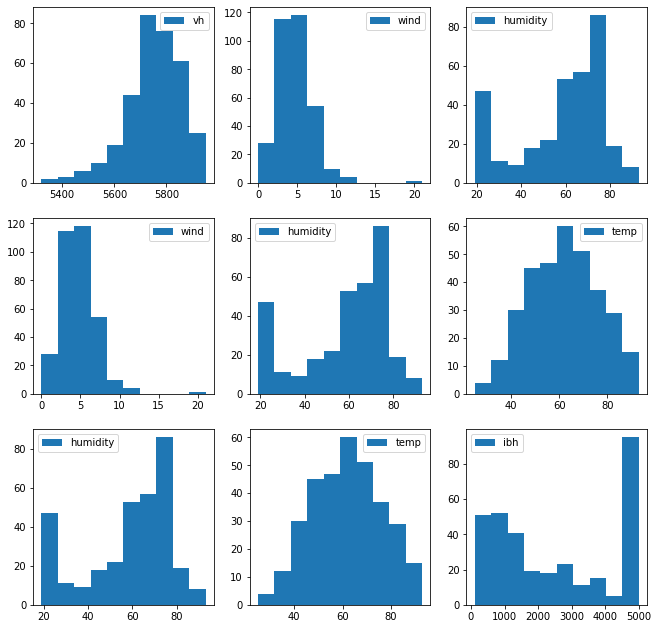

In [26]:
fig,axarr = plt.subplots(3,3,figsize=(11,11))
for i in range(3):
  for j in range(3):
    axarr[i,j].hist(oz_data[oz_data.columns[i+j+1]])
    axarr[i,j].legend([oz_data.columns[i+j+1]])

In [2]:
#The ozone information is in the first column, with the rest of the parameters being in the other columns.
tar1 = np.ravel(oz_data.loc[:,['ozone']])
display(tar1)
scaler = MinMaxScaler()
inp1 = scaler.fit_transform(oz_data.drop(['ozone'],axis=1))
display(inp1)

array([ 3,  5,  5,  6,  4,  4,  6,  7,  4,  6,  5,  4,  4,  7,  5,  9,  4,
        3,  4,  4,  5,  6,  9,  6,  6, 11, 10,  7, 12,  9,  2,  3,  3,  2,
        3,  3,  4,  6,  8,  6,  4,  3,  7, 11, 13,  6,  5,  4,  4,  6, 10,
       15, 23, 17,  7,  2,  3,  3,  4,  6,  7,  7,  6,  3,  2,  8, 12, 12,
       16,  9, 24, 13,  8, 10,  8,  9, 10, 14,  9, 11,  7,  9, 12, 12,  8,
        9,  5,  4,  4,  9, 13,  5, 10, 10,  7,  5,  4,  7,  3,  4,  7, 11,
       15, 22, 17,  7, 10, 19, 18, 12,  6,  9, 19, 21, 29, 16, 11,  2, 12,
       16, 22, 20, 27, 33, 25, 31, 18, 24, 16, 12,  9, 16,  8,  9, 29, 20,
        5,  5, 11, 12, 19, 17, 19, 16, 14, 10,  9,  7,  5,  2, 12, 22, 17,
       26, 27, 14, 11, 23, 26, 21, 15, 20, 15, 18, 26, 19, 13, 30, 26, 15,
       16, 16, 19, 23, 28, 34, 33, 24, 17, 10, 14, 13, 17, 22, 19, 20, 25,
       28, 29, 23, 26, 14, 13, 26, 22, 14, 13,  9, 12, 14, 24, 19, 16,  7,
        2,  4,  6, 12,  9, 15, 17, 13, 20, 22, 24, 26, 32, 33, 27, 38, 23,
       19, 19, 15, 28, 10

array([[0.61904762, 0.19047619, 0.12162162, ..., 0.31372549, 0.71428571,
        0.        ],
       [0.6031746 , 0.14285714, 0.24324324, ..., 0.42857143, 0.28571429,
        0.00276243],
       [0.6984127 , 0.14285714, 0.43243243, ..., 0.45938375, 0.17142857,
        0.00552486],
       ...,
       [0.58730159, 0.14285714, 0.05405405, ..., 0.3697479 , 0.2       ,
        0.99447514],
       [0.52380952, 0.14285714, 0.56756757, ..., 0.30252101, 0.11428571,
        0.99723757],
       [0.36507937, 0.19047619, 0.89189189, ..., 0.19327731, 0.28571429,
        1.        ]])

2. Split your data into a training and a test set. Select (or define one yourself) at least one metric of comparison you will use to evaluate your 3 models. The metric(s) should quantify the quality of the predictions.


In [3]:
# your input
X_tr1, X_va1, Y_tr1, Y_va1 = train_test_split(inp1, tar1, test_size=0.3)
print ('shape inp (magnitudes) == ', np.shape(inp1))
print ('shape tar (redshift) == ', np.shape(tar1))

print ('shape X_tr1 , Y_tr1 (trining set (input and target, respectively) == ', np.shape(X_tr1),np.shape(Y_tr1))
print ('shape X_va1 , Y_va1 (Validation set (input and target, respectively) == ', np.shape(X_va1),np.shape(Y_va1))
#I will evaluate my 3 models using the basic mean squared error statistic and the r^2 statistic.

shape inp (magnitudes) ==  (330, 9)
shape tar (redshift) ==  (330,)
shape X_tr1 , Y_tr1 (trining set (input and target, respectively) ==  (231, 9) (231,)
shape X_va1 , Y_va1 (Validation set (input and target, respectively) ==  (99, 9) (99,)


3. Fit a Random Forest model to predict the Upland Maximum Ozone levels from the features. Which of the feature influences the most?

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.00987357 0.00174702 0.04198084 0.67544566 0.05231006 0.04361409
 0.14806754 0.01780341 0.00915782]
the MSE is 18.55413839163408
r squared is 0.6925056048015596


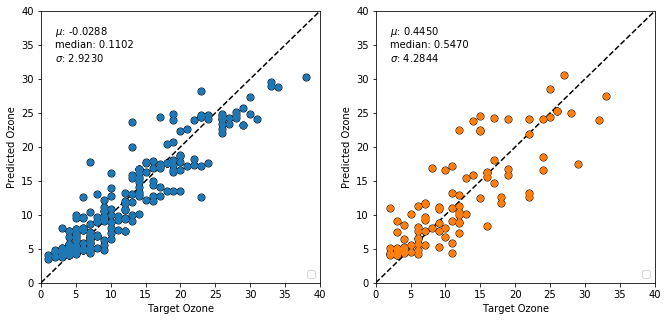

In [42]:
# Using a Random Forest Regressor
reg = RandomForestRegressor(n_estimators=35, criterion='mse',max_depth=4, min_samples_split=2, min_samples_leaf=2, max_leaf_nodes=None,bootstrap=True,random_state=10)
reg.fit(X_tr1, Y_tr1)
PY_tr1=reg.predict(X_tr1)
PY_va1=reg.predict(X_va1)
print(reg.feature_importances_)
print('the MSE is '+str(mean_squared_error(Y_va1,PY_va1)))
print('r squared is '+str(r2_score(Y_va1,PY_va1)))

def mu_med_sig(pre,tar):
    mu = np.mean(pre-tar)
    med = np.median(pre-tar)
    std = np.std(pre-tar)
    return mu,med,std

fig,axarr = plt.subplots(1,2,figsize=(11,5))

axarr[0].set_xlabel('Target Ozone')
axarr[0].set_ylabel('Predicted Ozone')
axarr[0].legend(loc=4)
mu,med,sig = mu_med_sig(PY_tr1,Y_tr1)
axarr[0].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[0].transAxes)
axarr[0].scatter(Y_tr1,PY_tr1,edgecolor='black',linewidths=2,facecolor=None)
axarr[0].scatter(Y_tr1,PY_tr1,facecolor='C0',label='Training set')

axarr[1].set_xlabel('Target Ozone')
axarr[1].set_ylabel('Predicted Ozone')
axarr[1].legend(loc=4)
mu,med,sig = mu_med_sig(PY_va1,Y_va1)
axarr[1].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[1].transAxes)
axarr[1].scatter(Y_va1,PY_va1,edgecolor='black',linewidths=2,facecolor=None)
axarr[1].scatter(Y_va1,PY_va1,facecolor='C1',label='Validation set')

for ax in axarr:
    xmin,xmax=0,40
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(xmin,xmax)
    ax.plot([xmin,xmax],[xmin,xmax],color='black',ls='dashed',zorder=-1)

I am not using cross-validation or any special data preparation here. According to my research, normalization is not helpful for the random forest regressor, but I have performed normalization because it has a significant impact on the SVC. The two most important features (by an order of magnitude) are temp (Sandburg AFB Temperature) and ibt (Inversion Base Temperature)

4. Fit a SVM model with a Radial Basis Function to predict the ozone levels. Do you need to regularize? Take the most important feature you determined in the previous question and inspect whether you see a bias in the predictions, for example in plotting the residual between the predicted and ground truth vs. an input feature.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


the MSE is 15.961974293168668
r squared is 0.7354650737291024


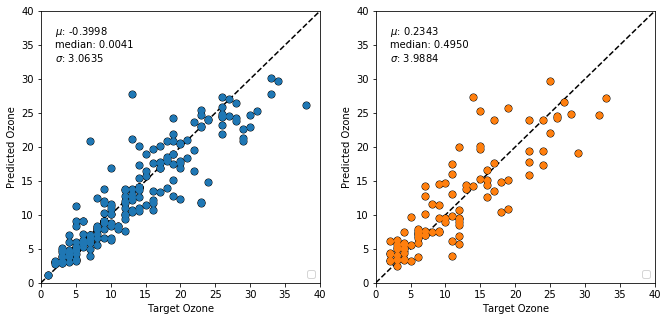

In [44]:
# your input
reg = SVR(C=10)
reg.fit(X_tr1, Y_tr1)
PY_tr1=reg.predict(X_tr1)
PY_va1=reg.predict(X_va1)
print('the MSE is '+str(mean_squared_error(Y_va1,PY_va1)))
print('r squared is '+str(r2_score(Y_va1,PY_va1)))

fig,axarr = plt.subplots(1,2,figsize=(11,5))

axarr[0].set_xlabel('Target Ozone')
axarr[0].set_ylabel('Predicted Ozone')
axarr[0].legend(loc=4)
mu,med,sig = mu_med_sig(PY_tr1,Y_tr1)
axarr[0].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[0].transAxes)
axarr[0].scatter(Y_tr1,PY_tr1,edgecolor='black',linewidths=2,facecolor=None)
axarr[0].scatter(Y_tr1,PY_tr1,facecolor='C0',label='Training set')

axarr[1].set_xlabel('Target Ozone')
axarr[1].set_ylabel('Predicted Ozone')
axarr[1].legend(loc=4)
mu,med,sig = mu_med_sig(PY_va1,Y_va1)
axarr[1].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[1].transAxes)
axarr[1].scatter(Y_va1,PY_va1,edgecolor='black',linewidths=2,facecolor=None)
axarr[1].scatter(Y_va1,PY_va1,facecolor='C1',label='Validation set')

for ax in axarr:
    xmin,xmax=0,40
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(xmin,xmax)
    ax.plot([xmin,xmax],[xmin,xmax],color='black',ls='dashed',zorder=-1)

I am not using cross-validation or any special data preparation here, but the normalization of the data proves to be critical to the performance of the SVC. Regularization is not required, because the data is already uniform in composition, and rows in the data which are missing data were already removed.

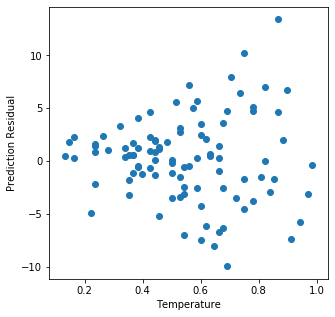

In [45]:
#Checking for a correlation bias with the most important feature, temp
temps = [i[3] for i in X_va1]
resid = [PY_va1[i]-Y_va1[i] for i in range(len(PY_va1))]
figure1 = plt.figure(figsize=[5,5])
plt.scatter(temps,resid)
plt.xlabel('Temperature')
plt.ylabel('Prediction Residual')
plt.show()

As temperature increases, the residual of the predicted ozone value becomes increasingly large as well. This indicates that a bias is present.

5. Fit a two layers MLP to predict the same ozone level. Use a cross-validation search to experiment the number of neurons in the two layers.

In [46]:
# your input
base_reg = MLPRegressor(learning_rate='adaptive', max_iter=5000, random_state=42)

# Define search space:
params = {
    'activation': ['logistic', 'relu', 'tanh'],  # <-- added 'tanh' as third non-linear activation function
    'alpha': np.logspace(0.0001, 100, 10),
    'hidden_layer_sizes': [
        (10, 10), (20, 10), (30, 10),
        (40, 10), (90, 10)  # <-- added more neurons or layers
    ]
}

# Find best hyper params and then refit on all training data:
reg = GridSearchCV(estimator=base_reg, param_grid=params,
                   n_jobs=8, cv=3, refit=True, verbose=5)  # <-- verbose=5
reg.fit(X_tr1,Y_tr1)

print(reg.best_estimator_)

print(reg.best_params_)

# Evaluate on unseen test data:
err = explained_variance_score(Y_tr1, reg.predict(X_tr1))
print(err)

err = explained_variance_score(Y_va1, reg.predict(X_va1))
print(err)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   17.5s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:  8.7min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 14.5min
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed: 15.0min finished


MLPRegressor(activation='relu', alpha=1.0002302850208247, batch_size='auto',
             beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 10), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
{'activation': 'relu', 'alpha': 1.0002302850208247, 'hidden_layer_sizes': (30, 10)}
0.7723006763218061
0.6811163706165214


No handles with labels found to put in legend.
No handles with labels found to put in legend.


the MSE is 19.921576310570423
r squared is 0.6698433023556356


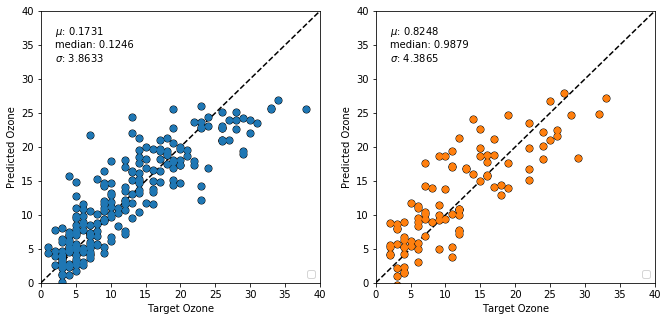

In [47]:
PY_tr1=reg.predict(X_tr1)
PY_va1=reg.predict(X_va1)
print('the MSE is '+str(mean_squared_error(Y_va1,PY_va1)))
print('r squared is '+str(r2_score(Y_va1,PY_va1)))

fig,axarr = plt.subplots(1,2,figsize=(11,5))

axarr[0].set_xlabel('Target Ozone')
axarr[0].set_ylabel('Predicted Ozone')
axarr[0].legend(loc=4)
mu,med,sig = mu_med_sig(PY_tr1,Y_tr1)
axarr[0].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[0].transAxes)
axarr[0].scatter(Y_tr1,PY_tr1,edgecolor='black',linewidths=2,facecolor=None)
axarr[0].scatter(Y_tr1,PY_tr1,facecolor='C0',label='Training set')

axarr[1].set_xlabel('Target Ozone')
axarr[1].set_ylabel('Predicted Ozone')
axarr[1].legend(loc=4)
mu,med,sig = mu_med_sig(PY_va1,Y_va1)
axarr[1].text(0.05,0.95,'$\mu$: %0.4f \nmedian: %0.4f \n$\sigma$: %0.4f'%(mu,med,sig),
              ha='left',va='top',transform=axarr[1].transAxes)
axarr[1].scatter(Y_va1,PY_va1,edgecolor='black',linewidths=2,facecolor=None)
axarr[1].scatter(Y_va1,PY_va1,facecolor='C1',label='Validation set')

for ax in axarr:
    xmin,xmax=0,40
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(xmin,xmax)
    ax.plot([xmin,xmax],[xmin,xmax],color='black',ls='dashed',zorder=-1)

6. Compare your 3 models. Discuss briefly.

Of the three models, the SVM regressor exhibited the best performance on this regression problem. Comparing the metrics of performance, as well as the accuracy of the mean, median, and scatter of the three metrics, the SVM regressor still significantly outperformed the Random Forest, and is an improvement over the performance of the MLP as well.